In [201]:
#Importing the necessary libraries
import os
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")



In [202]:
data=pd.read_csv(r"C:\Users\aravi\OneDrive\Documents\WebPoise\Mall-Customers-Segmentation\Dataset\Mall_Customers.csv")

In [203]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


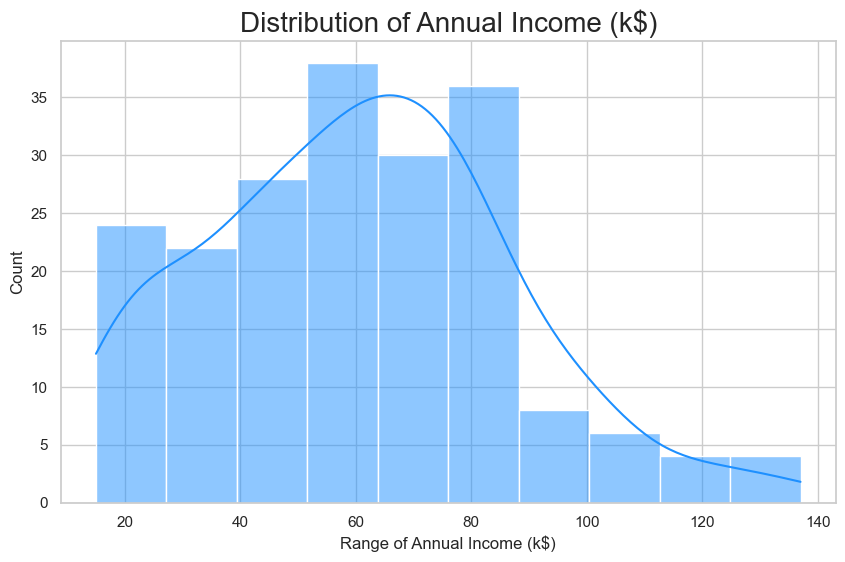

In [204]:
# Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

sns.histplot(data['Annual Income (k$)'], kde=True, color='dodgerblue')

plt.title('Distribution of Annual Income (k$)', fontsize=20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

plt.show()


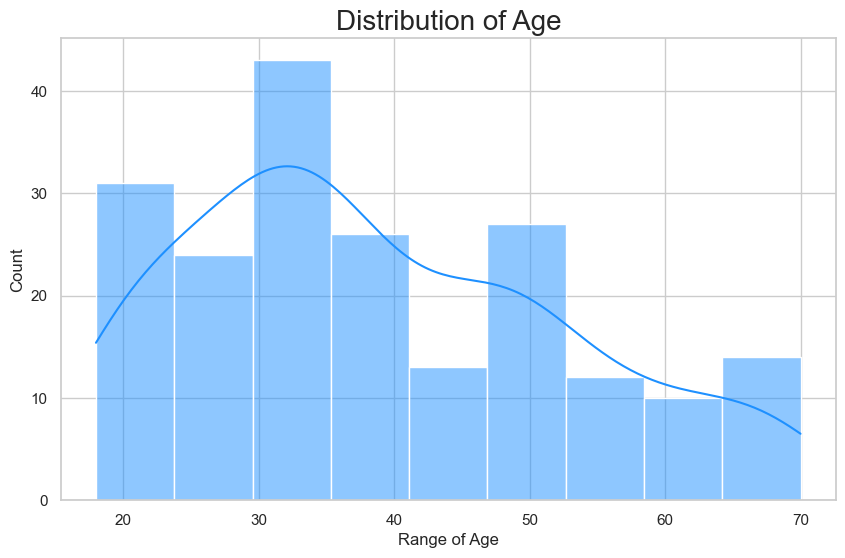

In [205]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

sns.histplot(data['Age'], kde=True, color='dodgerblue')

plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

plt.show()


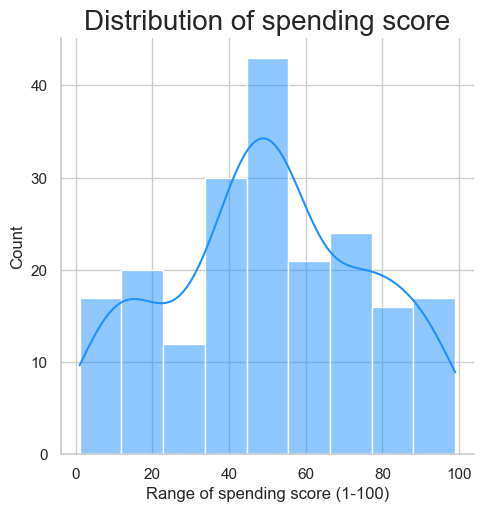

In [206]:
# distribution of spending score
sns.set(style="whitegrid")
sns.displot(data["Spending Score (1-100)"], kde=True, color="dodgerblue")

plt.title('Distribution of spending score', fontsize=20)
plt.xlabel('Range of spending score (1-100)')
plt.ylabel('Count')

plt.show()


C:\Users\aravi\AppData\Local\Temp\ipykernel_11260\2541440292.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genders.index, y=genders.values, palette=colors)


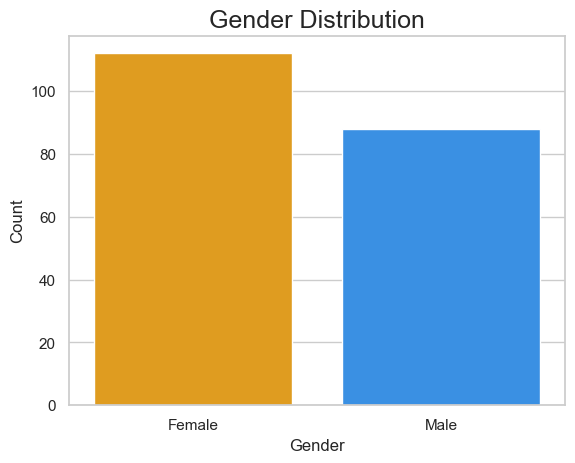

In [207]:
# gender analysis
genders = data["Gender"].value_counts()

colors = {
    "Male": "dodgerblue",
    "Female": "orange"
}

sns.set(style="whitegrid")
sns.barplot(x=genders.index, y=genders.values, palette=colors)

plt.title("Gender Distribution", fontsize=18)
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()


In [208]:
# considering two features: annual income and spending score
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


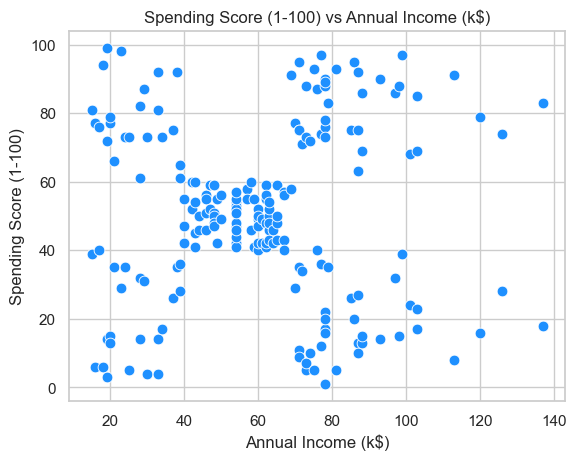

In [209]:
# scatterplot of the above data
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=X, s=60, color="dodgerblue")

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')

plt.show()

In [210]:
print("Elbow Method")

Elbow Method


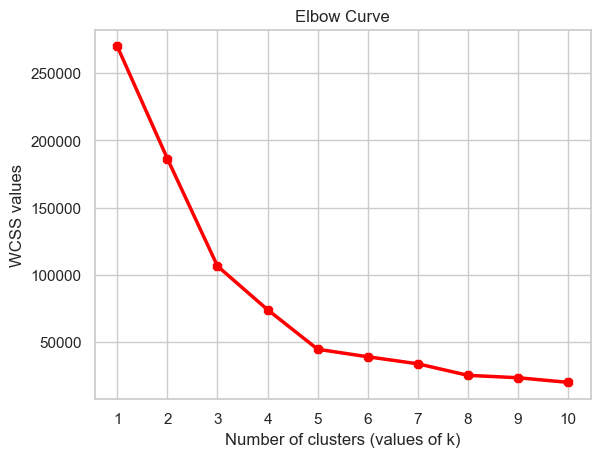

In [211]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(X)
    wcss.append(k_means.inertia_)
    
# the elbow curve
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="8")

plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")
plt.xticks(np.arange(1, 11, 1))

plt.show()

In [213]:
# taking k = 5
k_means_1 = KMeans(n_clusters=5, n_init="auto")

# fitting the input data
k_means_1.fit(X)

# predicting the labels of the input data
y_pred = k_means_1.predict(X)

# adding the labels to a column named label
data["label"] = y_pred

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


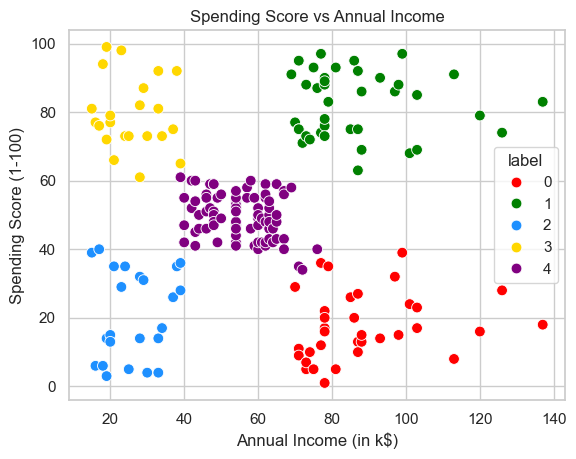

In [219]:
colors = ["red", "green", "dodgerblue", "gold", "purple"]

sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="label",
    palette=colors,
    data=data,
    s=60,
    legend="full"
)

plt.xlabel("Annual Income (in k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Spending Score vs Annual Income")

plt.show()
